In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("1730285881-Airbnb_Open_Data.csv")
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_8884\1807784550.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("1730285881-Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.info

<bound method DataFrame.info of              id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline     

In [9]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [11]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,06/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
#Drop duplicate records
df.drop_duplicates(inplace = True)
#drops house_rules and license columns with insufficient data
df.drop(['house_rules','license'], axis = 1, inplace = True)

#Remove all dollar Signs in the price and service fee columns
df['price']= df['price'].str.replace('$','', regex = False)
df['service fee'] = df['service fee'].str.replace('$','',regex = False)

#Remove all comas in the prce and service fee columns
df['price']= df['price'].str.replace('$','', regex=False)
df['service fee'] = df['service fee'].str.replace(',','', regex = False)

#Rename the price and service fee column to include dollar sign
df.rename(columns = {
    'price':"price_$",
    'service fee':'service_fee_$'
} ,inplace = True)

#Drop all records with missin values
df.dropna(inplace= True)

#Change all mismatched data types to the appropriate once.
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host_id']=df['host_id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

#Correct the Spelling of "brookln" to "brooklyn"
df.loc[df['neighbourhood group']=='brookln','neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in the "availability 365" column data
df=df.drop(df[df['availability 365'] > 500].index)




AttributeError: Can only use .str accessor with string values!

In [20]:
df.info

<bound method DataFrame.info of               id                                              NAME  \
0        1001254                Clean & quiet apt home by the park   
1        1002102                             Skylit Midtown Castle   
2        1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3        1002755                                               NaN   
4        1003689  Entire Apt: Spacious Studio/Loft by central park   
...          ...                                               ...   
102053  57365208               Cozy bright room near Prospect Park   
102054  57365760         Private Bedroom with Amazing Rooftop View   
102055  57366313     Pretty Brooklyn One-Bedroom for 2 to 4 people   
102056  57366865        Room & private bathroom in historic Harlem   
102057  57367417                                   Rosalee Stewart   

            host id host_identity_verified host name neighbourhood group  \
0       80014485718            unconfirmed  Madalin

In [22]:
df.duplicated().value_counts()

False    102058
Name: count, dtype: int64

In [23]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.488090,625.355580,125.039249,8.126640,27.517948,1.375408,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,331.672649,66.325905,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,31.000000,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [ ]:
# What are different property tpes in the Dataset?
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53429
Private room,46306
Shared room,2208
Hotel room,115


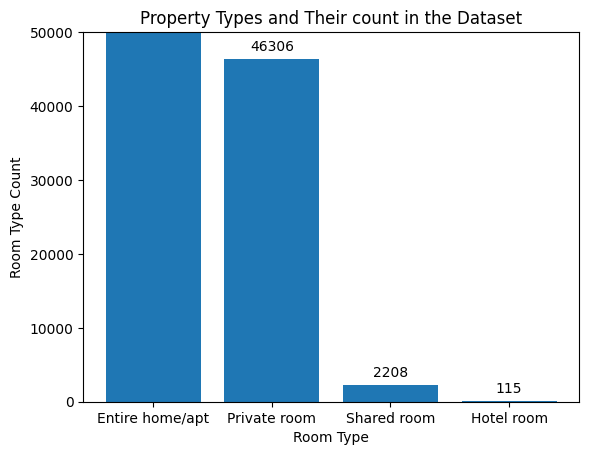

In [28]:
#Room type count plotted on a barchart
room_type_bar=plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and Their count in the Dataset');

In [29]:
hood_group= df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43557
Brooklyn,41630
Queens,13197
Bronx,2694
Staten Island,949
brookln,1
manhatan,1


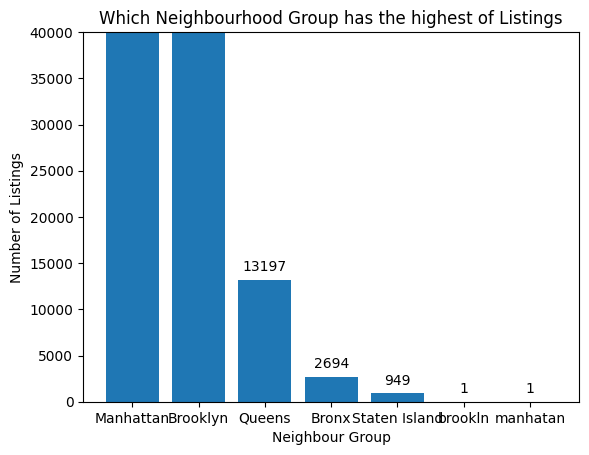

In [30]:
hood_group_bar=plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighbour Group');
plt.ylabel('Number of Listings');
plt.title('Which Neighbourhood Group has the highest of Listings');

In [33]:
# which neighbourhood group have the highest average prices fro Airbnb listings
avg_price= df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels = round(avg_price.loc[:,"price_$"], 2), label_type ='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings ($) in each Neighbourhood Group');



KeyError: 'Column not found: price_$'